# Data wrangling and Analyzing

## 1. Data gathering

This dataset is a csv file, it contains a movie data consisting of our genre,duration,country and so on.

In [4]:
#import your neccesary libiaries
import pandas as pd
import numpy as np

In [6]:
#import your data
df = pd.read_csv('test_data.csv')

In [8]:
df.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


## 2. Data Assessing

Assessing data is the second step in the data wrangling process after all the data has been gathered in the Gathering phase. It involves taking a look at the data to see whats wrong with it in terms of quality and tidiness. ill be assessing this data visually and programatically.

### i. Visual Assessment 

we are going to take a look at this data visually and looks and for errors,null values and unwanted info

In [14]:
df.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


- I notice the column names are uppercases and has spaces
- There are some weird columns that are not needed
- I noticed some columns has weird characters
- The release_year is not consistent
- I need to derive only the first genre for each movie
- I need to remove the unwanted characters from the income and votes columns

### i. Programatic Assessment

i'll be assessning my data programatically by writing some codes to know which of my values are missing and errors i couldnt see virtually

In [19]:
df.describe()

,Unnamed: 8
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


- from the above result i can see my unamed:8 column isnt useful

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMBD title ID   100 non-null    object 
 1   Original titlÊ  100 non-null    object 
 2   Release year    100 non-null    object 
 3   Genrë¨          100 non-null    object 
 4   Duration        99 non-null     object 
 5   Country         100 non-null    object 
 6   Content Rating  77 non-null     object 
 7   Director        100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
 9   Income          100 non-null    object 
 10   Votes          100 non-null    object 
 11  Score           100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.6+ KB


- I have some duplicate movie
- I have some errors in the duration columns
- The country column isnt clean enough
- I have some null values in the rating column
- and lastly i need make each column their appropriate data types

#### 1. change the column names to lowercases

In [26]:
#To change the column names to lower casses
df.columns = df.columns.str.lower()

In [28]:
df.head()

,imbd title id,original titlê,release year,genrë¨,duration,country,content rating,director,unnamed: 8,income,votes,score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


#### 2. Remove unwanted row and column

In [31]:
#To remove the unamed and imbd title id column
df.drop(columns=['unnamed: 8', 'imbd title id'], inplace=True)

In [33]:
#To check if the column was removed
df.head()

,original titlê,release year,genrë¨,duration,country,content rating,director,income,votes,score
0,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


In [35]:
#To check the row to be removed
df.loc[13]

original titlê    NaN
release year      NaN
genrë¨            NaN
duration          NaN
country           NaN
content rating    NaN
director          NaN
income            NaN
 votes            NaN
score             NaN
Name: 13, dtype: object

In [37]:
df.drop(index= 13, inplace=True)

#### 3. Rename the weird columns

In [40]:
#To rename the columns names
df.columns = ['original_title', 'release_year', 'genre', 'duration'
       ,'country', 'rating', 'director', 'income', 'votes', 'score']

In [42]:
#check if its applied
df.head()

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
0,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


#### 4. Change the release_year to consistent date

In [63]:
#To change my date format
df ['release_year'] = pd.to_datetime(df['release_year'], format = 'mixed')

In [55]:
df.loc[70, 'release_year'] = '10 August 1950'

In [57]:
df.loc[83, 'release_year'] = '9 December 1983'

In [59]:
df.loc[84, 'release_year'] = '8 February 1976'

In [61]:
df.loc[69, 'release_year'] = '31 October 1940'

In [65]:
df.head()

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
0,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


while doing this i noticed some errors and i looked up on the internet for the appopriate release year for some movies and i corrected them just as seen up there

#### 5. Derive only the first genre for each movie

In [69]:
#To get the first genre for each rolls
df['genre'] = df['genre'].str.split(',').str[0]

In [71]:
df.head(7)

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
0,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,The Godfather,1972-09-21,Crime,175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,The Dark Knight,2008-07-23,Action,152,USA,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,The Godfather: Part II,1975-09-25,Crime,220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,Pulp Fiction,1994-10-28,Crime,154,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"
5,The Lord of the Rings: The Return of the King,2004-02-22,Action,201,New Zealand,PG-13,Peter Jackson,$ 1142271098,1.604.280,08.9
6,Schindler's List,1994-03-11,Biography,Nan,USA,R,Steven Spielberg,$ 322287794,1.183.248,8.9


#### 6. Remove unwanted character from the income and votes column

In [74]:
df['income'] = df['income'].str.replace('[$,]', '', regex=True)

In [76]:
df.loc[3, 'income'] = 48035783

In [78]:
df.loc[7,'income'] = 377000

while removing the unwanted character in my income column, i noticed some vales not coreected and i corrected them as well

In [81]:
df['votes'] = df['votes'].str.replace('[.,]', '', regex=True)

In [83]:
df.head()

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
0,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
1,The Godfather,1972-09-21,Crime,175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
2,The Dark Knight,2008-07-23,Action,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.
3,The Godfather: Part II,1975-09-25,Crime,220,USA,R,Francis Ford Coppola,48035783,1098714,"9,.0"
4,Pulp Fiction,1994-10-28,Crime,154,USA,R,Quentin Tarantino,222831817,1780147,"8,9f"


#### 7. edit the duration column

In [86]:
#To check for null values
df.query("duration == 'Nan'")

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
6,Schindler's List,1994-03-11,Biography,Nan,USA,R,Steven Spielberg,322287794,1183248,8.9


In [88]:
df.iloc[6,3] = 195

In [90]:
df.head()

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
0,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
1,The Godfather,1972-09-21,Crime,175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
2,The Dark Knight,2008-07-23,Action,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.
3,The Godfather: Part II,1975-09-25,Crime,220,USA,R,Francis Ford Coppola,48035783,1098714,"9,.0"
4,Pulp Fiction,1994-10-28,Crime,154,USA,R,Quentin Tarantino,222831817,1780147,"8,9f"


#### 8. Edit the country column

In [94]:
#To replace the country column
df['country'] = df['country'].replace({'New Zesland':'New Zealand','New Zeland':'New Zealand','West germany':'Germany','US':'USA','Italy1':'Italy','US.':'USA'})

In [96]:
#To check it
df.country.value_counts()

country
USA             64
UK              12
Italy            5
Japan            4
New Zealand      3
France           3
South Korea      2
Germany          2
Brazil           1
India            1
Denmark          1
West Germany     1
Iran             1
Name: count, dtype: int64

In [98]:
df.rating.value_counts()

rating
R            45
PG-13        12
PG           11
G             6
Not Rated     1
Approved      1
Unrated       1
Name: count, dtype: int64

#### 9. The Rating column

In [101]:
#To fill the rating coulmn that has Nan with 'Not Rated'
df['rating'] = df['rating'].fillna('Not Rated')

i noticed some movie rating are not correct so i have to cheack and correct them

In [104]:
#To check for the approved movie rating column
df.query("rating == 'Approved'")

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
12,"Il buono, il brutto, il cattivo",1966-12-23,Western,161,Italy,Approved,Sergio Leone,25252481,672499,8.8


In [106]:
#To change the value to the correct rating
df.iloc[12,5] = 'R'

In [108]:
#To check if its done
df.loc[12]

original_title    Il buono, il brutto, il cattivo
release_year                  1966-12-23 00:00:00
genre                                     Western
duration                                      161
country                                     Italy
rating                                          R
director                             Sergio Leone
income                                   25252481
votes                                      672499
score                                         8.8
Name: 12, dtype: object

#### 10. To change our indexing

In [111]:
df.index = range(1, len(df) + 1)

In [113]:
df.head(14)

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
1,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
2,The Godfather,1972-09-21,Crime,175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
3,The Dark Knight,2008-07-23,Action,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.
4,The Godfather: Part II,1975-09-25,Crime,220,USA,R,Francis Ford Coppola,48035783,1098714,"9,.0"
5,Pulp Fiction,1994-10-28,Crime,154,USA,R,Quentin Tarantino,222831817,1780147,"8,9f"
6,The Lord of the Rings: The Return of the King,2004-02-22,Action,201,New Zealand,PG-13,Peter Jackson,1142271098,1604280,08.9
7,Schindler's List,1994-03-11,Biography,195,USA,R,Steven Spielberg,322287794,1183248,8.9
8,12 Angry Men,1957-09-04,Crime,96,USA,Not Rated,Sidney Lumet,377000,668473,8.9
9,Inception,2010-09-24,Action,148,USA,PG-13,Christopher Nolan,869784991,2002816,8..8
10,Fight Club,1999-10-29,Drama,Inf,UK,R,David Fincher,101218804,1807440,8.8


#### 11. Edit the score column

In [116]:
#To replace and remove the odd character
df['score'] = df['score'].replace({'9.':'9.0','9,.0':'9.0','8,9f':'8.9','08.9':'8.9','8..8':'8.8','8:8':'8.8','++8.7':'8.8','8.7.':'8.7','8,7e-0':'8.7','8,6':'8.6'})

#### 12. To replace our duration column

In [119]:
df.loc[7,'duration']= 195

In [121]:
df.loc[10,'duration']= 139

In [123]:
df.loc[12,'duration'] = 178

In [125]:
df.loc[14, 'duration']= 136

In [127]:
df.loc[16, 'duration']= 124

In [129]:
df.loc[18,'duration'] = 133

#### 12. To change some columns data type

In [132]:
df['score'] = df['score'].astype(float)       # Convert to float
df['votes'] = df['votes'].astype(int)         # Convert to int
df['income'] = df['income'].astype(int)
df['duration'] = df['duration'].astype(int)     #    "

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  100 non-null    object        
 1   release_year    100 non-null    datetime64[ns]
 2   genre           100 non-null    object        
 3   duration        100 non-null    int64         
 4   country         100 non-null    object        
 5   rating          100 non-null    object        
 6   director        100 non-null    object        
 7   income          100 non-null    int64         
 8   votes           100 non-null    int64         
 9   score           100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 7.9+ KB


In [136]:
df.head()

,original_title,release_year,genre,duration,country,rating,director,income,votes,score
1,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
2,The Godfather,1972-09-21,Crime,175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
3,The Dark Knight,2008-07-23,Action,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0
4,The Godfather: Part II,1975-09-25,Crime,220,USA,R,Francis Ford Coppola,48035783,1098714,9.0
5,Pulp Fiction,1994-10-28,Crime,154,USA,R,Quentin Tarantino,222831817,1780147,8.9


- Now we have a clean data and now we can analyze our data.

In [139]:
#Import your library for analyzing
import matplotlib.pyplot as plt
import seaborn as sns

#### i. we want to see which genre has the movie produced

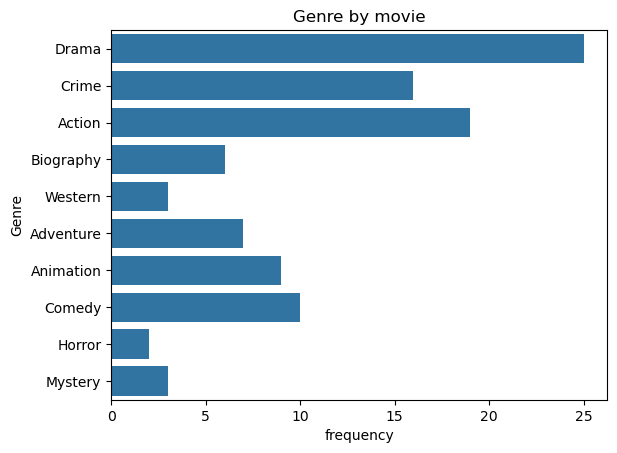

In [141]:
sns.countplot(y=df['genre'])
plt.title('Genre by movie')
plt.xlabel('frequency')
plt.ylabel('Genre')
plt.show()

- This is a simple histogram that shows the genre by movie and by the chart above we can see the highest genre is Drama

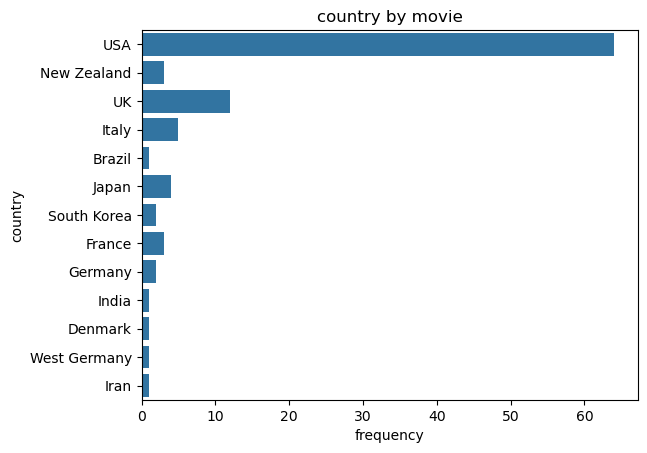

In [143]:
sns.countplot(y=df['country'])
plt.title('country by movie')
plt.xlabel('frequency')
plt.ylabel('country')
plt.show()